In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from pathlib import Path

import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw

from probeinterface import Probe, ProbeGroup, write_probeinterface, read_probeinterface, write_prb, read_prb
from probeinterface.plotting import plot_probe

from kilosort.io import save_probe

global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

# Probe Making

In [5]:
def create_probe(n_chan, contact_diameter, distanceTipToFirstElectrode, interElectrodeSpacing, device_indices=None, width=200):
    # kilosort config
    chanMap = np.arange(n_chan)
    kcoords = np.zeros(n_chan)
    xc = np.ones(n_chan)*(contact_diameter/2)
    yc = np.array([(contact_diameter/2) + interElectrodeSpacing*i for i in range(n_chan)])
    yc = yc[::-1] + distanceTipToFirstElectrode

    probe = {'chanMap': chanMap, 'xc': xc, 'yc': yc, 'kcoords': kcoords, 'n_chan': n_chan}

    # probeInterface visualization
    probe1 = Probe(ndim=2, si_units='um')
    probe1.set_contacts(positions=np.column_stack((xc, yc)), shapes='circle', shape_params={'radius': contact_diameter/2})
    probe1.set_contact_ids(chanMap)
    if device_indices:
        probe1.set_device_channel_indices(ripple_indices)

    polygon = [(-width, distanceTipToFirstElectrode), (0, 0), (width, distanceTipToFirstElectrode), (width, yc.max()+200), (-width, yc.max()+200)]
    probe1.set_planar_contour(polygon)

    return probe, probe1

In [3]:
SAVE_PATH = Path('/Users/kendranoneman/Projects/mayo/helperfunctions/mappings/probes/')

## Plexon v-probe (24 channels)

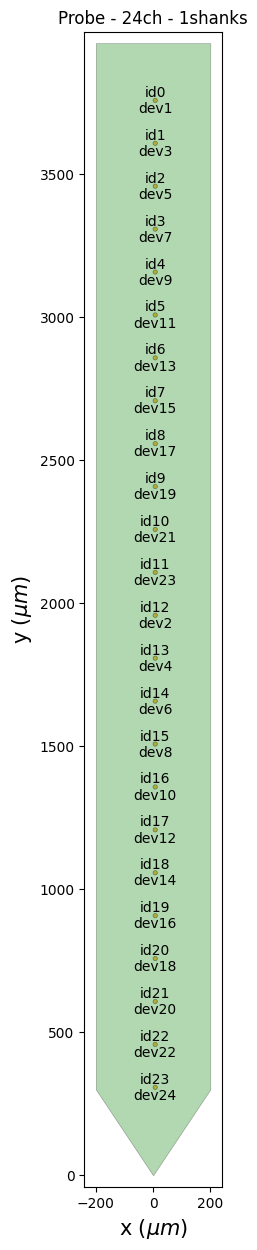

In [43]:
PROBE_TYPE = 'plexon_vProbe_24chan'
PROBE_IDs = ['N177P15','N178P15']

# PROBE SPECS (microns)
n_chan = 24
contact_diameter = 15
distanceTipToFirstElectrode = 300
interElectrodeSpacing = 150 
device_indices = np.array([1,3,5,7,9,11,13,15,17,19,21,23,2,4,6,8,10,12,14,16,18,20,22,24])

# CREATE PROBE (kilosort and probeInterface)
probe, probe1 = create_probe(n_chan, contact_diameter, distanceTipToFirstElectrode, interElectrodeSpacing, device_indices=device_indices)

fig, ax = plt.subplots(figsize=(15, 15))
if device_indices is not None:
    plot_probe(probe1, with_contact_id=True, with_device_index=True, ax=ax)
else:
    plot_probe(probe1, with_contact_id=True, with_device_index=False, ax=ax)

plt.show()

for probe_id in PROBE_IDs:
    save_probe(probe, SAVE_PATH / f'{probe_id}.json')
    fig.savefig(SAVE_PATH / f'{probe_id}_{PROBE_TYPE}.png')

## Plexon s-probe (24 channels)

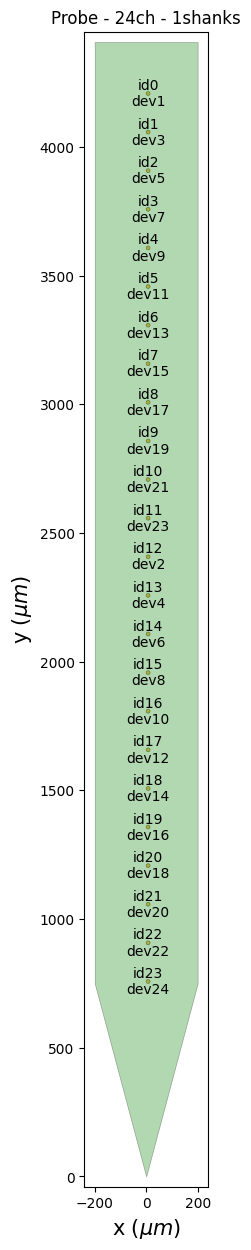

In [44]:
PROBE_TYPE = 'plexon_sProbe_24chan'
PROBE_IDs = ['N19415','N19417']

# PROBE SPECS (microns)
n_chan = 24
contact_diameter = 15
distanceTipToFirstElectrode = 750
interElectrodeSpacing = 150 
device_indices = np.array([1,3,5,7,9,11,13,15,17,19,21,23,2,4,6,8,10,12,14,16,18,20,22,24])

# CREATE PROBE (kilosort and probeInterface)
probe, probe1 = create_probe(n_chan, contact_diameter, distanceTipToFirstElectrode, interElectrodeSpacing, device_indices=device_indices)

fig, ax = plt.subplots(figsize=(15, 15))
if device_indices is not None:
    plot_probe(probe1, with_contact_id=True, with_device_index=True, ax=ax)
else:
    plot_probe(probe1, with_contact_id=True, with_device_index=False, ax=ax)
plt.show()

for probe_id in PROBE_IDs:
    save_probe(probe, SAVE_PATH / f'{probe_id}.json')
    fig.savefig(SAVE_PATH / f'{probe_id}_{PROBE_TYPE}.png')

## Plexon s-probe (16 channels)

In [ ]:
PROBE_TYPE = 'plexon_sProbe_16chan'
PROBE_IDs = ['N03314']

# PROBE SPECS (microns)
n_chan = 16
contact_diameter = 15
distanceTipToFirstElectrode = 800
interElectrodeSpacing = 200
ripple_indices = np.array([1,3,5,7,9,11,13,15,17,19,21,23,2,4,6,8,10,12,14,16,18,20,22,24])

# CREATE PROBE (kilosort and probeInterface)
probe, probe1 = create_probe(n_chan, contact_diameter, distanceTipToFirstElectrode, interElectrodeSpacing, ripple_indices)

fig, ax = plt.subplots(figsize=(15, 15))
plot_probe(probe1, with_contact_id=True, with_device_index=True, ax=ax)
plt.show()

for probe_id in PROBE_IDs:
    save_probe(probe, SAVE_PATH / f'{probe_id}.json')
    fig.savefig(SAVE_PATH / f'{probe_id}_{PROBE_TYPE}.png')

## SEEG Dixi Probe (162 channels)

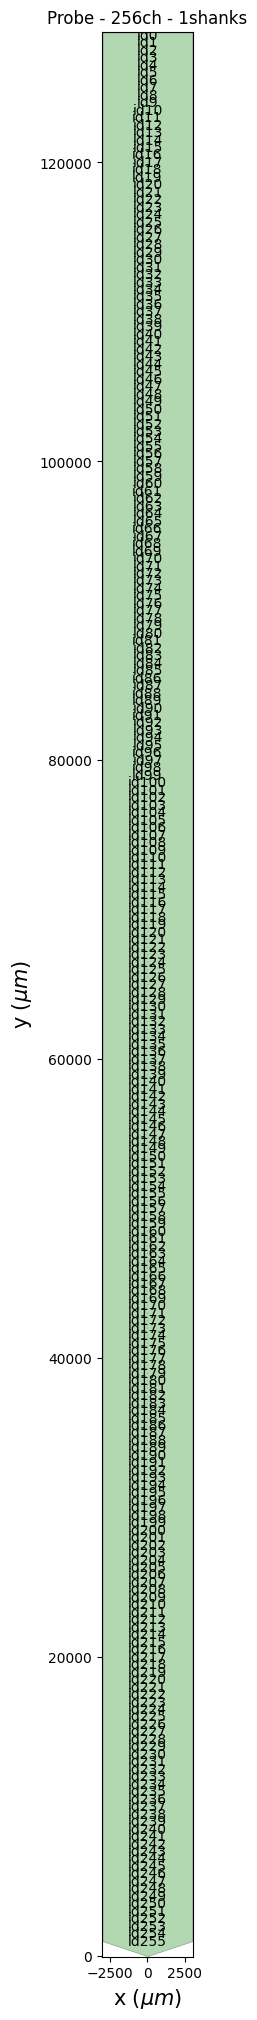

In [8]:
PROBE_TYPE = 'seeg_dixi_162chan'
PROBE_IDs = ['dixi1']

# PROBE SPECS (microns)
n_chan = 256
contact_diameter = 15
distanceTipToFirstElectrode = 1000
interElectrodeSpacing = 500
device_indices = None

# CREATE PROBE (kilosort and probeInterface)
probe, probe1 = create_probe(n_chan, contact_diameter, distanceTipToFirstElectrode, interElectrodeSpacing, width=3000)

fig, ax = plt.subplots(figsize=(15, 25))
if device_indices:
    plot_probe(probe1, with_contact_id=True, with_device_index=True, ax=ax)
else:
    plot_probe(probe1, with_contact_id=True, with_device_index=False, ax=ax)
plt.show()

for probe_id in PROBE_IDs:
    save_probe(probe, SAVE_PATH / f'{probe_id}.json')
    fig.savefig(SAVE_PATH / f'{probe_id}_{PROBE_TYPE}.png')

# Loading recordings

Channel ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Sampling frequency: 30000.0
Number of channels: 24
Number of segments: 1


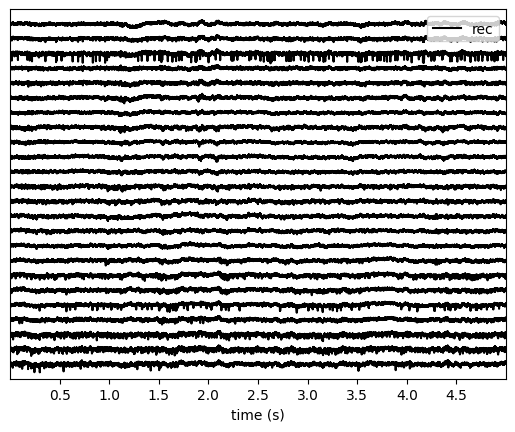

In [15]:
bin_path = Path("/Volumes/home/DATA/kendra_scrappy_0097a/kendra_scrappy_0097a.bin")

# Define recording parameters
sampling_frequency = 30000.0  # Adjust according to your MATLAB dataset
num_channels = 24  # Adjust according to your MATLAB dataset
dtype = "int16"  # MATLAB's double corresponds to Python's float64

# make sure to use the appropriate paths for adapting to your own pipeline
# adapt the extractor for your desired file format as well
recording = si.read_binary(file_paths=bin_path, sampling_frequency=sampling_frequency,
                           num_channels=num_channels, dtype=dtype)

channel_ids = recording.get_channel_ids()
fs = recording.get_sampling_frequency()
num_chan = recording.get_num_channels()
num_seg = recording.get_num_segments()

print("Channel ids:", channel_ids)
print("Sampling frequency:", fs)
print("Number of channels:", num_chan)
print("Number of segments:", num_seg)

w_ts = sw.plot_traces(recording, time_range=(0, 5))